In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

(20280800, 'chunk9')
(11388719, 'chunk28')

In [2]:
def getSeriesDF(cid, filename):
    localDF = pd.read_csv('data/Chunks/'+fileName+".csv").drop(columns=['Unnamed: 0'])
    localDF = localDF.loc[localDF['ContestId']==cid]
    localDF = localDF.assign(InvertedTime = localDF['SecondsRemaining'].max()-localDF['SecondsRemaining'])
    localDF = localDF.assign(SummedEntries = localDF['Entries'][::-1].cumsum()[::-1])
    observationsDF, cheatDF = localDF.loc[localDF['SecondsRemaining']>=240], localDF.loc[localDF['SecondsRemaining']<=240]
    return observationsDF, localDF
def zipCols(col1, col2):
    combined = []
    col1 = list(col1)
    col2 = list(col2)
    for i in range(0, len(col1)):
        combined.append([(col1[i]), col2[i]])
    return combined[::-1]
def combineStatesAndObservations(time, observations, states):
    combined = [[0, 0]]*max(time)
    stateSum = 0
    for i in range(0, len(combined)):
        if(i in list(time)):
            index = list(time).index(i)
#             print(index)

            stateSum = states.iloc[index]
            combined[i] = [observations.iloc[index], states.iloc[index]]
        else:
            combined[i] = [0, stateSum]
    return combined

In [127]:
chunkMapDF = pd.read_csv('data/chunkMap.csv')

In [137]:
# cid, fileName  = (20280800, 'chunk9')
contest = chunkMapDF.sample(n=1).iloc[0]
cid, fileName  = contest.ContestId, contest.Chunk
seriesDF, fullSeriesDF = getSeriesDF(cid, fileName)

In [138]:
observations = zipCols(seriesDF.Entries,seriesDF.SummedEntries)

In [170]:
# specify parameters
random_state = np.random.RandomState(0)
transition_matrix = [[1, 0.1], [0, 1]]
transition_offset = [-0.1, 0.1]
observation_matrix = np.eye(2) + random_state.randn(2, 2) * 0.1
observation_offset = [1.0, -1.0]
transition_covariance = np.eye(2)
observation_covariance = np.eye(2) + random_state.randn(2, 2) * 0.1
initial_state_mean = [1, -1]
initial_state_covariance = [[1, 0.1], [-0.1, 1]]

# sample from model
kf = KalmanFilter(
    transition_matrix, observation_matrix, transition_covariance,
    observation_covariance, transition_offset, observation_offset,
    initial_state_mean, initial_state_covariance,
    random_state=random_state
)

In [171]:
# estimate state with filtering and smoothing
filtered_state_estimates = kf.filter(observations)[0]
smoothed_state_estimates = kf.smooth(observations)[0]


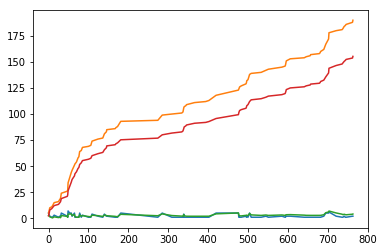

In [172]:
plt.plot(seriesDF.InvertedTime,seriesDF.Entries)
plt.plot(seriesDF.InvertedTime,seriesDF.SummedEntries)
plt.plot(seriesDF.InvertedTime[::-1],filtered_state_estimates[:, 0])
plt.plot(seriesDF.InvertedTime[::-1],filtered_state_estimates[:, 1])

In [80]:
# estimate state with filtering and smoothing
# filtered_state_estimates = kf.filter(observations)[0]
# smoothed_state_estimates = kf.smooth(observations)[0]